**Multi** **Classifier** 

Libraries Installation and Data Uploading

In [63]:
pip install pyarabic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
import pandas as pd
import re
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pyarabic.araby as araby
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
#from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.ensemble import ExtraTreesClassifier
import joblib
from sklearn.tree import export_graphviz
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from matplotlib.legend_handler import HandlerLine2D

In [65]:
uploaded=files.upload()

Saving Class.xlsx to Class (2).xlsx


In [89]:
# data=pd.read_excel('Class.xlsx')

In [90]:
# len(data)

In [91]:
# data.columns

In [92]:
# data.tail()

In [93]:
# data=data.drop(['Unnamed: 0'],axis=1)

In [ ]:
# data.tail()

Data Preprocessing

In [94]:
# data["main_class"].fillna("لا يوجد", inplace = True)
# data["branch_class"].fillna("لا يوجد", inplace = True)


In [95]:
# data['text']=data['text'].astype('string')
# data['main_class']=data['main_class'].astype('string')
# data['branch_class']=data['branch_class'].astype('string')

In [96]:
# data.info()

In [66]:
def reading_data():
  data=pd.read_excel('Class.xlsx')
  data=data.drop(['Unnamed: 0'],axis=1)
  data["main_class"].fillna("لا يوجد", inplace = True)
  data["branch_class"].fillna("لا يوجد", inplace = True)
  data['text']=data['text'].astype('string')
  data['main_class']=data['main_class'].astype('string')
  data['branch_class']=data['branch_class'].astype('string')




In [67]:
step1=reading_data()

In [68]:
def text_normalization(x):
    #x=x .str.strip()
    x=x.replace({' +':' '},regex=True)
    x = x.replace("  ",' ', regex=True)
    x=x.replace('ة','ه', regex=True)
    x=x.replace('أ','ا', regex=True)
    x=x.replace('إ','ا', regex=True)
    x = x.replace('\n&\n',' ', regex=True)
    x = x.replace('&',' ', regex=True)
    x = x.replace('\n',' ', regex=True)
    x = x.replace('/',' ', regex=True)
    x = x.replace('”',' ', regex=True)
    x = x.replace('“',' ', regex=True)
    x = x.replace('"',' ', regex=True)
    x = x.replace('!',' ', regex=True)
    x = x.replace('\r',' ', regex=True)
    x=x.replace(r'[\(\)\d]', ' ',regex=True)
    print(x)
    return x

def removing_tashkeel(text):
    #text=data['text']
    noise = re.compile(""" ّ    | # Tashdid
                             َ    | # Fatha
                             ً    | # Tanwin Fath
                             ُ    | # Damma
                             ٌ    | # Tanwin Damm
                             ِ    | # Kasra
                             ٍ    | # Tanwin Kasr
                             ْ    | # Sukun
                             ـ     # Tatwil/Kashida
                         """, re.VERBOSE)
    text = re.sub(noise, '', text)
    text = re.sub(r'(.)\1+', r"\1\1", text) # Remove longation
    return araby.strip_tashkeel(text)
    #print(text)
 

In [97]:
def call_func():
  data['text1']=text_normalization(data['text'])
  data['text1']=data['text1'].apply(removing_tashkeel)

In [98]:
step2=call_func()

0      دقيق قمح محلي اسمر صوامع الغلال 
1          دقيق محلي ابيض صوامع الغلال 
2                            ذره الحلوه
3          ارز بسمتي ابيض هندي المهيدب 
4                ارز مزه هندي  ابو كاس 
                     ...               
165                          شقه مفروشه
166               حلاقه للرجال والاولاد
167           حفائظ اطفال محليه بامبرز 
168               مناديل ورق محلي فاين 
169              نفقات الحفلات والافراح
Name: text, Length: 170, dtype: string


In [71]:
data['text1']

0      دقيق قمح محلي اسمر صوامع الغلال 
1          دقيق محلي ابيض صوامع الغلال 
2                            ذره الحلوه
3          ارز بسمتي ابيض هندي المهيدب 
4                ارز مزه هندي  ابو كاس 
                     ...               
165                          شقه مفروشه
166               حلاقه للرجال والاولاد
167           حفائظ اطفال محليه بامبرز 
168               مناديل ورق محلي فاين 
169              نفقات الحفلات والافراح
Name: text1, Length: 170, dtype: object

Data Discovering

In [72]:
len(data['main_class'].unique())

10

In [73]:
data['main_class'].value_counts().to_frame()


,main_class
الأغذية والمشروبات,93
السلع الإنشائية,38
الأعلاف والحيوانات الحية,13
الملابس,10
المنظفات,4
السلع والخدمات الشخصية المتنوعة,4
الصحة,3
صيانة وإصلاح معدات النقل الشخصية,2
الفنادق والشقق المفروشة,2
التبغ,1


In [74]:
len(data['branch_class'].unique())

12

In [75]:
data['branch_class'].value_counts().to_frame()


,branch_class
لا يوجد,77
الخضار,25
الفواكه والمكسرات,18
الحليب ومنتجاته والبيض,12
الخبز والحبوب,10
اللحوم والدواجن,10
الزيوت والدهون,4
القهوة والشاي,4
السمك وطعام البحر,3
المياه المعدنية والمرطبات والعصيرات,3


In [76]:
data.groupby(['main_class','branch_class'])['text'].count().to_frame()

text
main_class                       branch_class                             
الأعلاف والحيوانات الحية         لا يوجد                                13
الأغذية والمشروبات               الحليب ومنتجاته والبيض                 12
                                 الخبز والحبوب                          10
                                 الخضار                                 25
                                 الزيوت والدهون                          4
                                 السكر والحلويات                         2
                                 السمك وطعام البحر                       3
                                 الفواكه والمكسرات                      18
                                 القهوة والشاي                           4
                                 اللحوم والدواجن                        10
                                 المياه المعدنية والمرطبات والعصيرات     3
                                 منتجات غذائية غير مصنفة في مكان آخر     2
التبغ                            لا يوجد                                 1
السلع الإنشائية                  لا يوجد                                38
السلع والخدمات الشخصية المتنوعة  لا يوجد                                 4
الصحة                            لا يوجد                                 3
الفنادق والشقق المفروشة          لا يوجد                                 2
الملابس                          لا يوجد                                10
المنظفات                         لا يوجد                                 4
صيانة وإصلاح معدات النقل الشخصية لا يوجد                                 2

In [77]:
def preprocessing(data):
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(data['main_class'])
  data['main_class1']=le.transform(data['main_class'])
  le.fit(data['branch_class'])
  data['branch_class1']=le.transform(data['branch_class'])
  print(data)

step3= preprocessing(data)

                                 text                       main_class  \
0    دقيق قمح محلي اسمر(صوامع الغلال)               الأغذية والمشروبات   
1        دقيق محلي أبيض(صوامع الغلال)               الأغذية والمشروبات   
2                          ذرة الحلوة               الأغذية والمشروبات   
3       أرز  بسمتي أبيض هندي(المهيدب)               الأغذية والمشروبات   
4              أرز مزة هندي (أبو كاس)               الأغذية والمشروبات   
..                                ...                              ...   
165                        شقه مفروشه          الفنادق والشقق المفروشة   
166             حلاقه للرجال والاولاد  السلع والخدمات الشخصية المتنوعة   
167         حفائظ أطفال محلية(بامبرز)  السلع والخدمات الشخصية المتنوعة   
168             مناديل ورق محلي(فاين)  السلع والخدمات الشخصية المتنوعة   
169            نفقات الحفلات والافراح  السلع والخدمات الشخصية المتنوعة   

      branch_class                             text1  main_class1  \
0    الخبز والحبوب  دقيق قمح محلي اسمر صوا

Developing the models

In [78]:
data.columns

Index(['text', 'main_class', 'branch_class', 'text1', 'main_class1',
       'branch_class1'],
      dtype='object')

Data Splitting

In [102]:
# to use this   **************************************
X =data['text1']
y = data['main_class1']
y1 = data['branch_class1']
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1, test_size= 0.2)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y1,random_state=1, test_size= 0.2)
vect = CountVectorizer( )
vect.fit(X_train)
  # print(X_train.shape)
  # print(X_test.shape)
  # print(y_train.shape)
  # print(y_test.shape) 
  #return  X_train, X_test, y_train, y_test



CountVectorizer()

In [80]:
# step4=prepearing(data)

Random Forest

In [81]:
from sklearn.pipeline import Pipeline
model_pipeline = Pipeline(steps=[('reading data',step1),
                                 ('text Preprocessing1',step2),
                                  ('pre_processing',step3),
                                 ('random_forest', RandomForestClassifier())
                                 ])
#print(X_train)
# vect = CountVectorizer( )
# vect.fit(X_train)
# fit the pipeline with the training data
model_pipeline.fit(vect.transform(X_train),y_train)

Pipeline(steps=[('reading data', None), ('text Preprocessing1', None),
                ('pre_processing', None),
                ('random_forest', RandomForestClassifier())])

In [82]:
print(y_train)

59     1
66     1
78     1
124    3
47     1
      ..
133    3
137    3
72     1
140    3
37     1
Name: main_class1, Length: 136, dtype: int64


In [83]:
train_predict=model_pipeline.predict(vect.transform(X_train))
y_predict=model_pipeline.predict(vect.transform(X_test))
df=pd.DataFrame(model_pipeline.predict(vect.transform(X_test)),y_test)
df.head()

,0
main_class1,
1,1
1,1
1,1
1,1
6,1


In [84]:
# text_normalization(data)

In [85]:
# clf_random = RandomForestClassifier()
# clf_random.fit(vect.transform(X_train), y_train)

###########################################

# clf_random1 = RandomForestClassifier()
# clf_random1.fit(vect.transform(X_train1), y_train1)


In [86]:
print('------- First ------------')
print("Training accuracy", accuracy_score(y_train,train_predict))
print("Testing accuracy", accuracy_score(y_test,y_predict))

------- First ------------
Training accuracy 1.0
Testing accuracy 0.7941176470588235


In [87]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.74      1.00      0.85        20
           2       0.00      0.00      0.00         1
           3       1.00      1.00      1.00         7
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1

    accuracy                           0.79        34
   macro avg       0.25      0.29      0.26        34
weighted avg       0.64      0.79      0.71        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'predicted label')

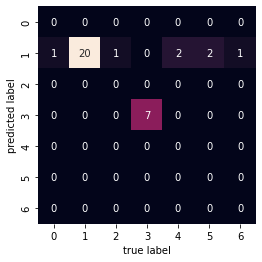

In [88]:
sns.heatmap(confusion_matrix(y_predict,y_test), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Dataframe to insert into the second model

In [99]:
summary_df = pd.DataFrame()
summary_df['target'] = y_test
# # We capture our predictions in into a new column from the model.predict method
summary_df['prediction'] = y_predict
print (summary_df)

     target  prediction
48        1           1
91        1           1
19        1           1
35        1           1
164       6           1
88        1           1
106       3           3
14        1           1
123       3           3
118       3           3
11        1           1
4         1           1
89        1           1
92        1           1
81        1           1
108       3           3
112       3           3
165       6           1
125       3           3
153       0           1
29        1           1
51        1           1
99        7           1
31        1           1
119       3           3
42        1           1
90        1           1
16        1           1
102       7           1
54        1           1
40        1           1
145       8           1
5         1           1
93        2           1


In [100]:
df_second=pd.merge(data, summary_df, left_index=True, right_index=True)
df_second

,text,main_class,branch_class,text1,main_class1,branch_class1,target,prediction
4,أرز مزة هندي (أبو كاس),الأغذية والمشروبات,الخبز والحبوب,ارز مزه هندي ابو كاس,1,1,1,1
5,شعيرية بيرفيتو,الأغذية والمشروبات,الخبز والحبوب,شعيريه بيرفيتو,1,1,1,1
11,لـحــــم ضأن طـــازج,الأغذية والمشروبات,اللحوم والدواجن,لحم ضان طازج,1,8,1,1
14,تكلفة طبخ الذبيحه,الأغذية والمشروبات,اللحوم والدواجن,تكلفه طبخ الذبيحه,1,8,1,1
16,دجاج مجــمـد محــلـي(الوطنية),الأغذية والمشروبات,اللحوم والدواجن,دجاج مجمد محلي الوطنيه,1,8,1,1
19,أفخاذ دجاج طازج ( الوطنية ),الأغذية والمشروبات,اللحوم والدواجن,افخاذ دجاج طازج الوطنيه,1,8,1,1
29,قشطه التاج,الأغذية والمشروبات,الحليب ومنتجاته والبيض,قشطه التاج,1,0,1,1
31,جبن كاسات محلي(المراعي),الأغذية والمشروبات,الحليب ومنتجاته والبيض,جبن كاسات محلي المراعي,1,0,1,1
35,زبده (لورباك),الأغذية والمشروبات,الزيوت والدهون,زبده لورباك,1,3,1,1
40,تفـــاح أصفــــر,الأغذية والمشروبات,الفواكه والمكسرات,تفاح اصفر,1,6,1,1


Second Classifier

In [103]:
clf_random1 = RandomForestClassifier()
clf_random1.fit(vect.transform(X_train1), y_train1)

RandomForestClassifier()

In [ ]:
train_predict1=clf_random1.predict(vect.transform(X_train1))
y_predict1=clf_random1.predict(vect.transform(X_test1))
df1=pd.DataFrame(clf_random1.predict(vect.transform(X_test1)),y_test1)
df1.head()

,0
branch_class1,
6,10
9,2
8,8
3,10
10,10


In [ ]:
print('-------- second -----------' )
print("Training accuracy", accuracy_score(y_train1,train_predict1))
print("Testing accuracy", accuracy_score(y_test1,y_predict1))

-------- second -----------
Training accuracy 1.0
Testing accuracy 0.5


In [ ]:
print(classification_report(y_test1, y_predict1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         5
           7       1.00      0.50      0.67         2
           8       1.00      0.50      0.67         4
           9       0.00      0.00      0.00         3
          10       0.54      1.00      0.70        14

    accuracy                           0.50        34
   macro avg       0.28      0.22      0.23        34
weighted avg       0.40      0.50      0.41        34



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(91.68, 0.5, 'predicted label')

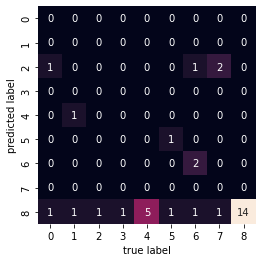

In [ ]:
sns.heatmap(confusion_matrix(y_predict1,y_test1), square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Testing the Second Classfier with The dataFrame of First Classifier

In [ ]:
df_second

,text,main_class,branch_class,text1,main_class1,branch_class1,target,prediction
4,أرز مزة هندي (أبو كاس),الأغذية والمشروبات,الخبز والحبوب,ارز مزه هندي ابو كاس,1,1,1,1
5,شعيرية بيرفيتو,الأغذية والمشروبات,الخبز والحبوب,شعيريه بيرفيتو,1,1,1,1
11,لـحــــم ضأن طـــازج,الأغذية والمشروبات,اللحوم والدواجن,لحم ضان طازج,1,8,1,1
14,تكلفة طبخ الذبيحه,الأغذية والمشروبات,اللحوم والدواجن,تكلفه طبخ الذبيحه,1,8,1,1
16,دجاج مجــمـد محــلـي(الوطنية),الأغذية والمشروبات,اللحوم والدواجن,دجاج مجمد محلي الوطنيه,1,8,1,1
19,أفخاذ دجاج طازج ( الوطنية ),الأغذية والمشروبات,اللحوم والدواجن,افخاذ دجاج طازج الوطنيه,1,8,1,1
29,قشطه التاج,الأغذية والمشروبات,الحليب ومنتجاته والبيض,قشطه التاج,1,0,1,1
31,جبن كاسات محلي(المراعي),الأغذية والمشروبات,الحليب ومنتجاته والبيض,جبن كاسات محلي المراعي,1,0,1,1
35,زبده (لورباك),الأغذية والمشروبات,الزيوت والدهون,زبده لورباك,1,3,1,1
40,تفـــاح أصفــــر,الأغذية والمشروبات,الفواكه والمكسرات,تفاح اصفر,1,6,1,1


In [ ]:
# # to use this
X2 = df_second['text1']
y3 = df_second['branch_class1']
#vect = CountVectorizer( )
X_t1= vect.transform(X2)
print(vect.transform(X_train).shape)
print(vect.transform(df_second['text1']).shape)

(136, 243)
(34, 243)


In [ ]:
y_predict1_second=clf_random1.predict(vect.transform(X2))
df1_second=pd.DataFrame(clf_random1.predict(vect.transform(X2)),y3)

In [ ]:
df1_second

,0
branch_class1,
1,6
1,10
8,8
8,10
8,2
8,8
0,10
0,2
3,10


In [ ]:
extract1=((y_predict1_second-y3).sort_values())
ex=pd.DataFrame(extract1)
len(ex.loc[ex['branch_class1']!=0])

17

In [ ]:
pd.merge(data, df1_second, left_index=True, right_index=True)


,text,main_class,branch_class,text1,main_class1,branch_class1,0
0,دقيق قمح محلي اسمر(صوامع الغلال),الأغذية والمشروبات,الخبز والحبوب,دقيق قمح محلي اسمر صوامع الغلال,1,1,10
0,دقيق قمح محلي اسمر(صوامع الغلال),الأغذية والمشروبات,الخبز والحبوب,دقيق قمح محلي اسمر صوامع الغلال,1,1,2
1,دقيق محلي أبيض(صوامع الغلال),الأغذية والمشروبات,الخبز والحبوب,دقيق محلي ابيض صوامع الغلال,1,1,6
1,دقيق محلي أبيض(صوامع الغلال),الأغذية والمشروبات,الخبز والحبوب,دقيق محلي ابيض صوامع الغلال,1,1,10
2,ذرة الحلوة,الأغذية والمشروبات,الخبز والحبوب,ذره الحلوه,1,1,10
3,أرز بسمتي أبيض هندي(المهيدب),الأغذية والمشروبات,الخبز والحبوب,ارز بسمتي ابيض هندي المهيدب,1,1,10
6,مكرونة بيرفيتو محلي,الأغذية والمشروبات,الخبز والحبوب,مكرونه بيرفيتو محلي,1,1,10
6,مكرونة بيرفيتو محلي,الأغذية والمشروبات,الخبز والحبوب,مكرونه بيرفيتو محلي,1,1,10
6,مكرونة بيرفيتو محلي,الأغذية والمشروبات,الخبز والحبوب,مكرونه بيرفيتو محلي,1,1,10
6,مكرونة بيرفيتو محلي,الأغذية والمشروبات,الخبز والحبوب,مكرونه بيرفيتو محلي,1,1,10


########################################################